In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [7]:
#Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed28c0cea97d009a76797206357695ce


In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tanout
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | bendigo
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | kavieng
Processing Record 6 of Set 1 | lazdijai
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | kodinsk
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | coihaique
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | naze
Processing Record 14 of Set 1 | menongue
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | asyut
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | aleksandrovka
Processing Record 22 of Set 1 | green river
Processing Record 23 of Set 1 | vestmannaeyjar
Processi

Processing Record 41 of Set 4 | plettenberg bay
Processing Record 42 of Set 4 | trofors
Processing Record 43 of Set 4 | mola di bari
Processing Record 44 of Set 4 | natchitoches
Processing Record 45 of Set 4 | moa
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | neiafu
Processing Record 48 of Set 4 | tasiilaq
Processing Record 49 of Set 4 | port lincoln
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | san lorenzo de el escorial
Processing Record 4 of Set 5 | dali
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | karauzyak
City not found. Skipping...
Processing Record 7 of Set 5 | colac
Processing Record 8 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 9 of Set 5 | waipawa
Processing Record 10 of Set 5 | tonantins
Processing Record 11 of Set 5 | ust-maya
Processing Record 12 of Set 5 | nome
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | conceicao do araguaia
Processing Record 31 of Set 8 | jiazi
Processing Record 32 of Set 8 | takoradi
Processing Record 33 of Set 8 | goderich
Processing Record 34 of Set 8 | miquelon
Processing Record 35 of Set 8 | dujuma
City not found. Skipping...
Processing Record 36 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 37 of Set 8 | faya
Processing Record 38 of Set 8 | ponta delgada
Processing Record 39 of Set 8 | sao felix do xingu
Processing Record 40 of Set 8 | san juan
Processing Record 41 of Set 8 | port alfred
Processing Record 42 of Set 8 | krasnoselkup
Processing Record 43 of Set 8 | vredendal
Processing Record 44 of Set 8 | deer lake
Processing Record 45 of Set 8 | banswara
Processing Record 46 of Set 8 | chekhov
Processing Record 47 of Set 8 | ipora
Processing Record 48 of Set 8 | pitea
Processing Record 49 of Set 8 | chibuto
Processing Record 50 of Set 8 | kapoeta
Processing Record 1 of Set 9 | broken hill
Processing Record 2 

Processing Record 11 of Set 12 | najran
Processing Record 12 of Set 12 | jaru
Processing Record 13 of Set 12 | dongsheng
Processing Record 14 of Set 12 | medveda
Processing Record 15 of Set 12 | kutum
Processing Record 16 of Set 12 | rio gallegos
Processing Record 17 of Set 12 | mayo
Processing Record 18 of Set 12 | ruidoso
Processing Record 19 of Set 12 | puerto carreno
Processing Record 20 of Set 12 | westport
Processing Record 21 of Set 12 | rio rancho
Processing Record 22 of Set 12 | tezu
Processing Record 23 of Set 12 | roald
Processing Record 24 of Set 12 | kendari
Processing Record 25 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 26 of Set 12 | la asuncion
Processing Record 27 of Set 12 | miri
Processing Record 28 of Set 12 | pierre
Processing Record 29 of Set 12 | fuyu
Processing Record 30 of Set 12 | anadyr
Processing Record 31 of Set 12 | ambon
Processing Record 32 of Set 12 | geresk
City not found. Skipping...
Processing Record 33 of Set 12 | north b

In [12]:
len(city_data)

547

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tanout,14.9709,8.8879,79.99,18,17,10.13,NE,2021-10-26 03:39:46
1,New Norfolk,-42.7826,147.0587,64.65,33,1,3.18,AU,2021-10-26 03:39:47
2,Bendigo,-36.7667,144.2833,73.85,33,5,3.00,AU,2021-10-26 03:38:09
3,Hithadhoo,-0.6000,73.0833,83.21,68,100,16.06,MV,2021-10-26 03:39:47
4,Kavieng,-2.5744,150.7967,83.44,70,67,5.32,PG,2021-10-26 03:39:48
5,Lazdijai,54.2333,23.5167,37.54,79,100,9.62,LT,2021-10-26 03:39:48
6,Atuona,-9.8000,-139.0333,78.01,71,11,15.59,PF,2021-10-26 03:39:48
7,Cape Town,-33.9258,18.4232,62.11,63,0,1.01,ZA,2021-10-26 03:39:48
8,Kodinsk,58.6881,99.1844,35.74,69,83,10.22,RU,2021-10-26 03:39:49
9,Rikitea,-23.1203,-134.9692,75.78,72,76,15.73,PF,2021-10-26 03:39:49


In [17]:
new_column_order =["City","Country","Date","Lat", "Lng","Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tanout,NE,2021-10-26 03:39:46,14.9709,8.8879,79.99,18,17,10.13
1,New Norfolk,AU,2021-10-26 03:39:47,-42.7826,147.0587,64.65,33,1,3.18
2,Bendigo,AU,2021-10-26 03:38:09,-36.7667,144.2833,73.85,33,5,3.00
3,Hithadhoo,MV,2021-10-26 03:39:47,-0.6000,73.0833,83.21,68,100,16.06
4,Kavieng,PG,2021-10-26 03:39:48,-2.5744,150.7967,83.44,70,67,5.32


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

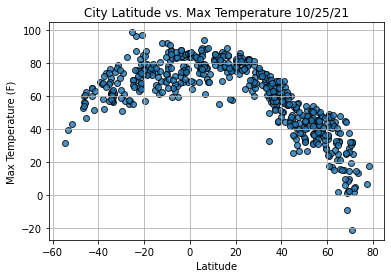

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

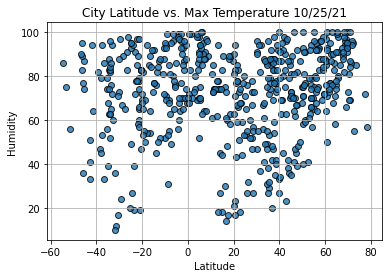

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

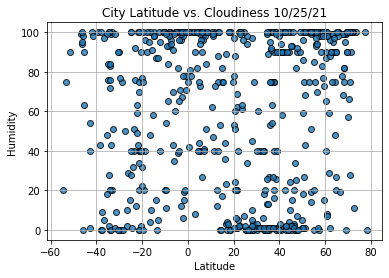

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

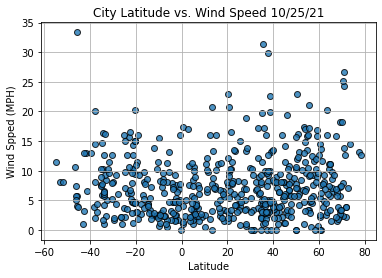

In [30]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Spped (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()